In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
d= pd.read_excel("/content/drive/MyDrive/Estadística Descriptiva Inferencial y Bayesiana/IPC-Puestos.xlsx")
d.head(10)

,Date,IPC,Puestos
0,2015-01-01,81.131159,4496.513
1,2015-02-01,81.377366,4500.146
2,2015-03-01,81.999630,4778.660
3,2015-04-01,82.319844,4751.061
4,2015-05-01,82.784429,4656.938
5,2015-06-01,83.059555,4684.786
6,2015-07-01,83.433977,4715.906
7,2015-08-01,83.748711,4755.930
8,2015-09-01,83.771774,4829.617
9,2015-10-01,83.891400,4841.052


In [ ]:
def tabla_frec(x, clases=True, n_clases=None):
  import math
  import pandas as pd

  xx = x[(x.isnull() == False)].copy()
  n_total = len(xx)
  nn_clases = None
  if clases:

    if n_clases is None:
      nn_clases = int(round(1+3.322*math.log10(n_total),0))
    else:
      nn_clases = n_clases



    xx, bins = pd.cut(xx, bins=nn_clases, right=False, retbins=True,
                      include_lowest=True, duplicates='drop')


    # Tabulación cruzada de los intervalos de clase y las frecuencias
    df_freq = pd.crosstab(index=xx, columns="f", dropna=False)
    # Agregando el resto de las frecuencias necesarias
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)

    mc = []
    for i in range(len(bins)-1):
      mc.append(round((bins[i]+bins[i+1])/2,2))
    df_freq['mc'] = mc

  else:

    df_freq = pd.crosstab(index=xx, columns="f")
    total = df_freq['f'].sum()
    df_freq['F'] = df_freq['f'].cumsum()
    df_freq['fr'] = round(df_freq['f']/total,5)
    df_freq['Fr'] = round(df_freq['F']/total,5)

  return nn_clases, df_freq;


In [ ]:
n_clases_d,d_IPC= tabla_frec(d.IPC)
#print(tab_age.to_latex())
display(d.IPC)
print("\n")
n_clases_dp,d_pw= tabla_frec(d.Puestos)
#print(tab_age.to_latex())
display(d.Puestos)
print("\n")

0       81.131159
1       81.377366
2       81.999630
3       82.319844
4       82.784429
          ...    
97     109.024924
98     110.391537
99     111.005592
100    111.358436
101    111.188314
Name: IPC, Length: 102, dtype: float64

0      4496.513
1      4500.146
2      4778.660
3      4751.061
4      4656.938
         ...   
97     5513.049
98     5890.724
99     5821.053
100    5600.045
101         NaN
Name: Puestos, Length: 102, dtype: float64

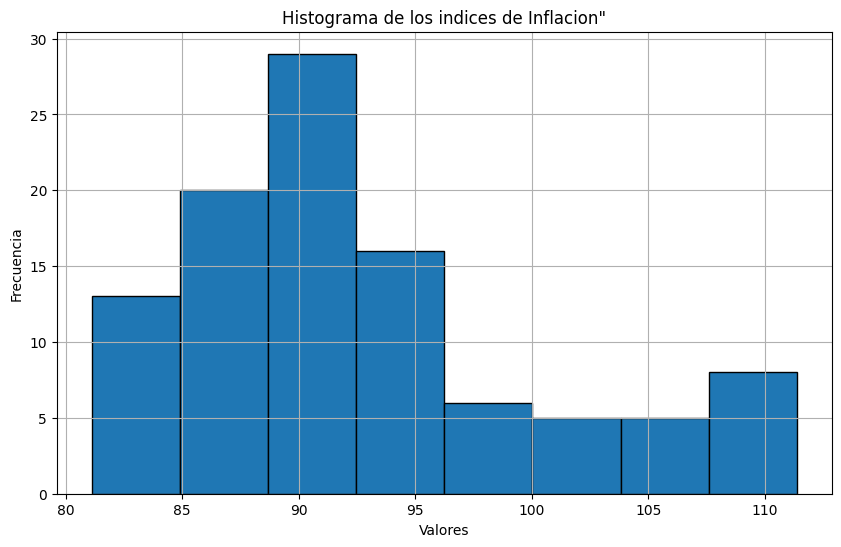

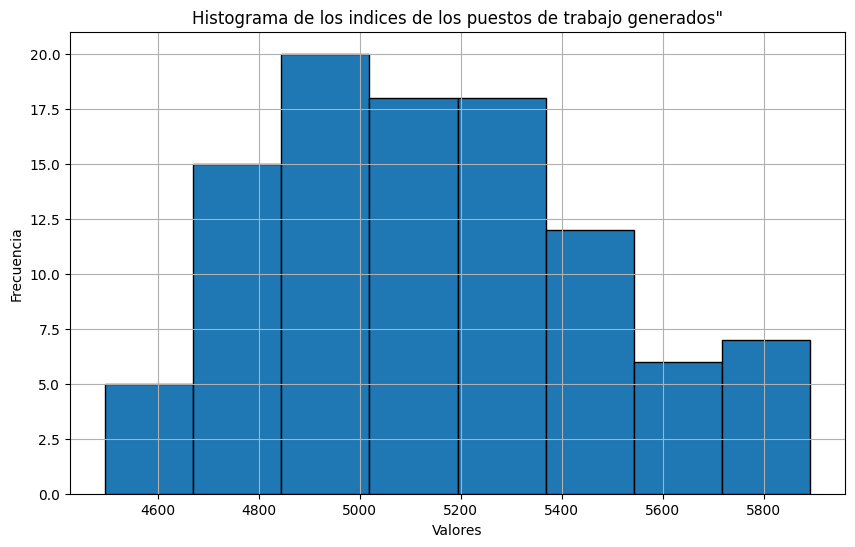

<Figure size 640x480 with 0 Axes>

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(d.IPC, bins=n_clases_d, edgecolor='black')
plt.title('Histograma de los indices de Inflacion"')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.hist(d.Puestos, bins=n_clases_dp, edgecolor='black')
plt.title('Histograma de los indices de los puestos de trabajo generados"')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
DIR="/content/drive/MyDrive/Estadística Descriptiva Inferencial y Bayesiana"
plt.show()
plt.savefig(dir+"HIST.PNG")

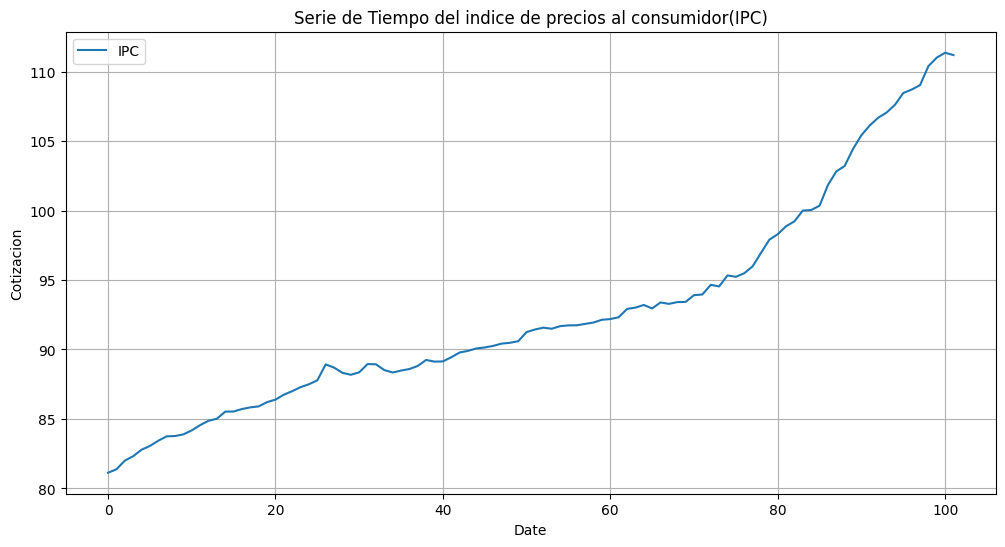

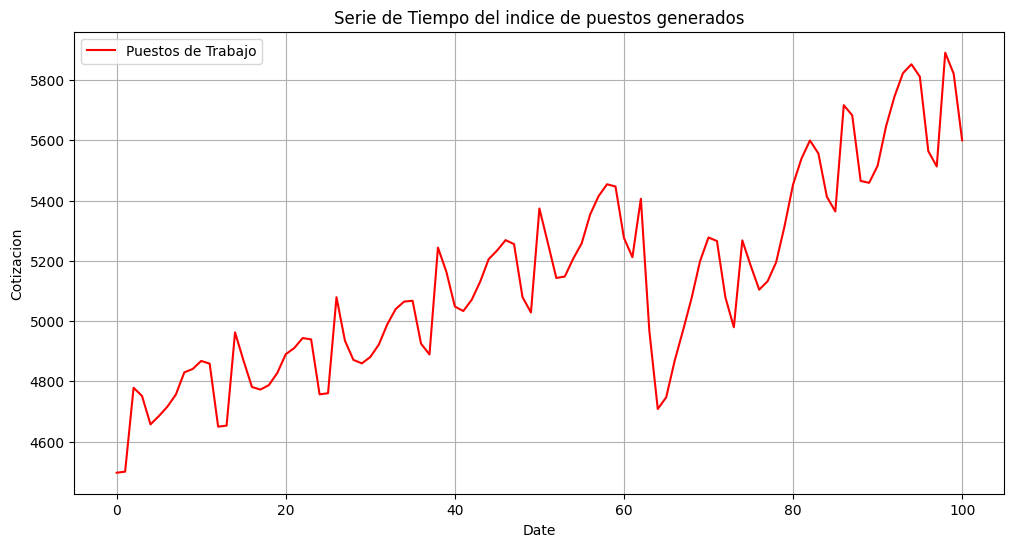

<Figure size 640x480 with 0 Axes>

In [110]:
import matplotlib.pyplot as plt

# Desplegar gráfico de la variable "Close"
plt.figure(figsize=(12, 6))
plt.plot(d.index, d['IPC'], label='IPC')
plt.title('Serie de Tiempo del indice de precios al consumidor(IPC)')
plt.xlabel('Date')
plt.ylabel('Cotizacion')
plt.legend()
plt.grid(True)
plt.savefig("Series de Tiempo2.png")
# Desplegar gráfico de la variable "Open"
plt.figure(figsize=(12, 6))
plt.plot(d.index, d['Puestos'], label='Puestos de Trabajo', color='red')
plt.title('Serie de Tiempo del indice de puestos generados')
plt.xlabel('Date')
plt.ylabel('Cotizacion')
plt.legend()
plt.grid(True)
plt.show()
dir="/content/drive/MyDrive/Estadística Descriptiva Inferencial y Bayesiana"
plt.savefig("Series de Tiempo1.png")

In [98]:
display(d.describe())
print("Para el indice precios al consumidor(IPC)\n")
print("Varianza:\n",round(d.IPC.var(),2))
print("Coefieciente de variacion:\n",round(d.IPC.std()/d.IPC.mean(),2))
print("Rango:\n[",d.IPC.min(),",",d.IPC.max(),"]")
print("Para el indice de puesto de trabajo generados)\n")
print("Puestos:\n",round(d.Puestos.var(),2))
print("Coefieciente de variacion:\n",round(d.Puestos.std()/d.Puestos.mean(),2))
print("Rango:\n[",d.Puestos.min(),",",d.Puestos.max(),"]")
cov=round(d.corr()*d.IPC.std()*d.Puestos.std(),2)


,IPC,Puestos
count,102.000000,101.000000
mean,92.728507,5137.027158
std,7.657133,328.112718
min,81.131159,4496.513000
25%,87.880797,4871.015000
50%,91.346086,5079.810000
75%,95.446719,5363.777000
max,111.358436,5890.724000


Para el indice precios al consumidor(IPC)

Varianza:
 58.63
Coefieciente de variacion:
 0.08
Rango:
[ 81.1311585614732 , 111.358436 ]
Para el indice de puesto de trabajo generados)

Puestos:
 107657.96
Coefieciente de variacion:
 0.06
Rango:
[ 4496.513 , 5890.724 ]


<ipython-input-98-1774a47964ce>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov=round(d.corr()*d.IPC.std()*d.Puestos.std(),2)


#Matriz de Correlacion

<ipython-input-111-6cb3d3c2bcae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(d.corr(),annot=True,cmap="YlGnBu")


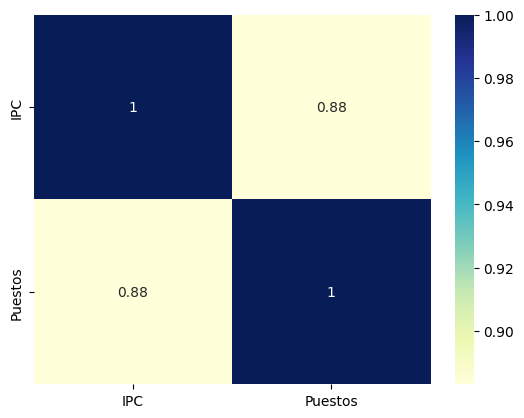

<Figure size 640x480 with 0 Axes>

In [111]:
import seaborn as sns
sns.heatmap(d.corr(),annot=True,cmap="YlGnBu")
plt.show()
plt.savefig("cor.png")

#Matriz de Varianza Y Covarianza

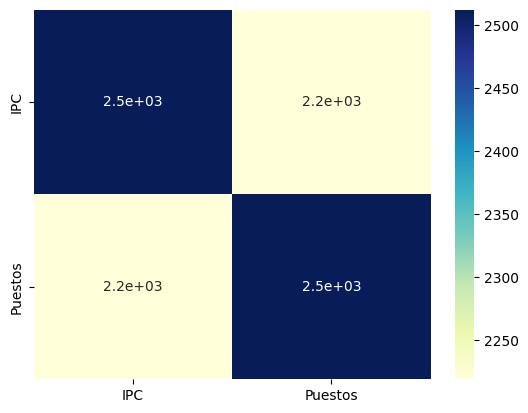

In [97]:
sns.heatmap(cov,annot=True,cmap="YlGnBu")
plt.show()